# Random Variables and Distributions
DA Probability & Statistics Learning Series • Lesson 3(?)

<img src="https://ihaveapc.com/wp-content/uploads/2018/03/1-2.jpg" align="center" width="30%"/>

Welcome, again!

*See **#da_prob_stat** for discussion during and after this tutorial.*

A **Random Variable** is a variable whose possible values are numerical outcomes of a random process
<img src="https://www.mathsisfun.com/data/images/random-variable-1.svg" align="center"/>

X really refers to the distribution of possible values and the associated probabilities.
This contrasts to your conventional algebraic variables that typically have a single value

A **discrete random variable** is one which may take on only a countable number of distinct values. For example, rolling a die.

$$
\begin{align}
X &= [{1},{2},{3},{4},{5},{6}]
\end{align}
$$

A discrete random variable must adhere to the following two rules:

$$
1: 0 < P(X=x_i) < 1 \text{ for each i }\\
2: P(X=x_1)+P(X=x_2)+...+P(X=x_k)=1
$$

A **continuous random variable** is one which takes an infinite number of possible values

$$
\begin{align}
Y &= \text{ exact transit time of a shipment }
\end{align}
$$

In [3]:
# Import dependencies 
from custom.db_utils import get_connection
import pandas as pd

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Get the database connection and cursor objects
conn, cur = get_connection()

# Use a context manager to open and close connection and files
with conn:
    
    # Open the query.sql file
    with open('invoicing_otp.sql', 'r') as q:

        # Save contents of query.sql as string
        query_str = q.read()
    
    # Use the read_sql method to get the data from Snowflake into a 
    # Pandas dataframe
    df = pd.read_sql(query_str, conn)
    
    # Make all the columns lowercase
    df.columns = map(str.lower, df.columns)

# Preview the data
df.sample(3)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


,invoice_id,invoice_shared_at,share_due_at,is_invoiced_on_time,days_to_share
18308,829740,2020-06-18 16:20:00.590881,2020-05-23 16:00:00+00:00,False,26.0139
26259,784826,2020-07-15 19:18:31.331282,2020-07-16 14:41:15+00:00,True,-0.8075
4079,758527,2020-06-04 13:22:48.726151,2020-06-06 16:00:00+00:00,True,-2.1092


**TODO**: Define 2 random variables, one discrete and one continuous

Discrete Random Variable
$$
x=\left\{\begin{matrix}
1\text{ on-time}\\
0\text{ late}\;\;\;\;\;
\end{matrix}\right.
$$

Continuous Random Variable
$$
Y=\text{time to share}
$$

Now lets plot the distributions of these random variables

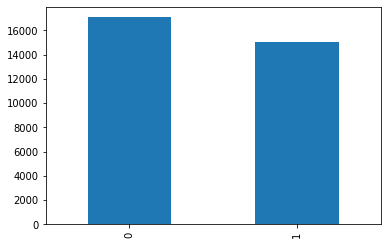

In [50]:
import numpy as np
import matplotlib.pyplot as plt

df['is_invoiced_on_time'].astype(int).value_counts().plot(kind="bar")

#this is a bernoulli distribution, the discrete probability distribution of a random variable 
#which takes the value 1 with probability p and the value 0 with probability q=1-p

(array([   15.,    58.,   146.,   303.,   410.,   564.,   868.,  1159.,
         2322., 14181.,  4977.,  2248.,  1498.,  1149.,   759.,   509.,
          394.,   277.,   160.,    85.]),
 array([-54.9157  , -49.171095, -43.42649 , -37.681885, -31.93728 ,
        -26.192675, -20.44807 , -14.703465,  -8.95886 ,  -3.214255,
          2.53035 ,   8.274955,  14.01956 ,  19.764165,  25.50877 ,
         31.253375,  36.99798 ,  42.742585,  48.48719 ,  54.231795,
         59.9764  ]),
 <a list of 20 Patch objects>)

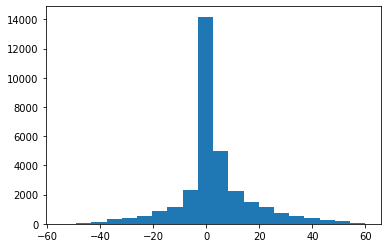

In [35]:
share_times = df['days_to_share'].tolist()
plt.hist(share_times, bins=20)

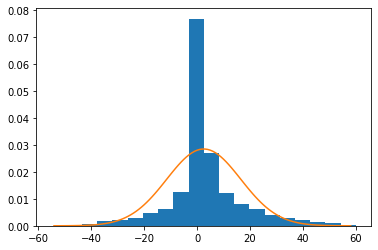

In [36]:
mean = np.mean(share_times)
std = pstd(share_times)

from scipy.stats import norm
distribution = norm(mean, std)

min_time = min(share_times)
max_time = max(share_times)
values = list(range(int(min_time), int(max_time)))
probabilities = [distribution.pdf(v) for v in values]

from matplotlib import pyplot
pyplot.hist(share_times, bins=20, density=True) # , 
pyplot.plot(values, probabilities)